Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
#carregando o dataset 
df = pd.read_csv('E:/00_Bootcamp_Infnet/06_Final_Project_INFNET/customer-segmentation-dataset/Mall_Customers.csv') 

In [4]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [5]:
df.drop('CustomerID', axis = 1, inplace = True) # dropando costumer ID

In [6]:
df = df.rename(columns={'Annual Income (k$)':'Annual_Income','Spending Score (1-100)':'Spending_Score'}) #renomando as colunas 

In [7]:
df.columns = df.columns.str.lower()

In [8]:
df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
#info verificando se existem dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


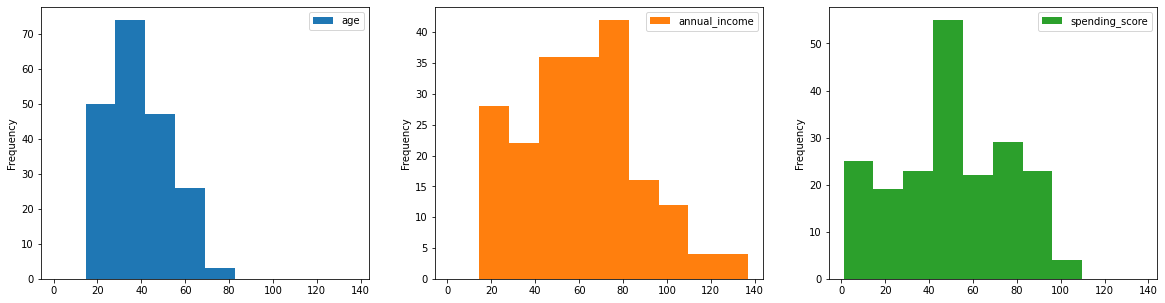

In [10]:
#Histograma dos dados 
fig,ax = plt.subplots(1,3,figsize=(20,5))
df.plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

In [11]:
df.groupby("gender").age.agg('count')


gender
Female    112
Male       88
Name: age, dtype: int64

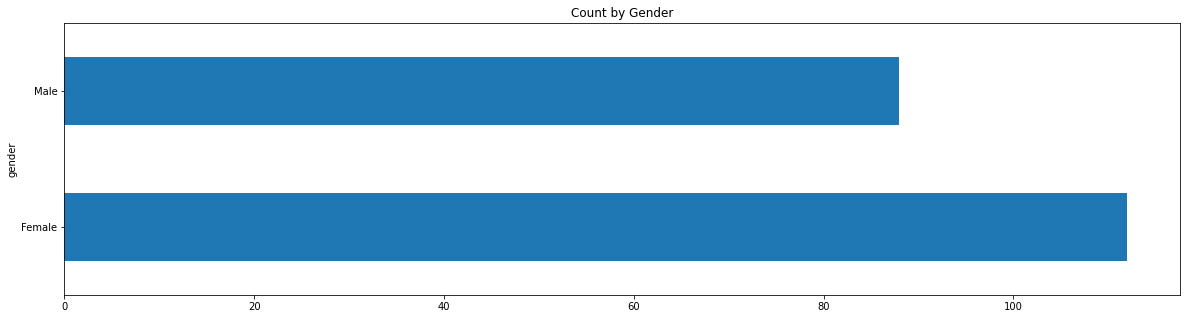

In [12]:
fig,ax=plt.subplots(1,1,figsize=(20,5))
df.groupby("gender").age.agg('count').plot(kind='barh',ax=ax).set_title('Count by Gender')
plt.show()

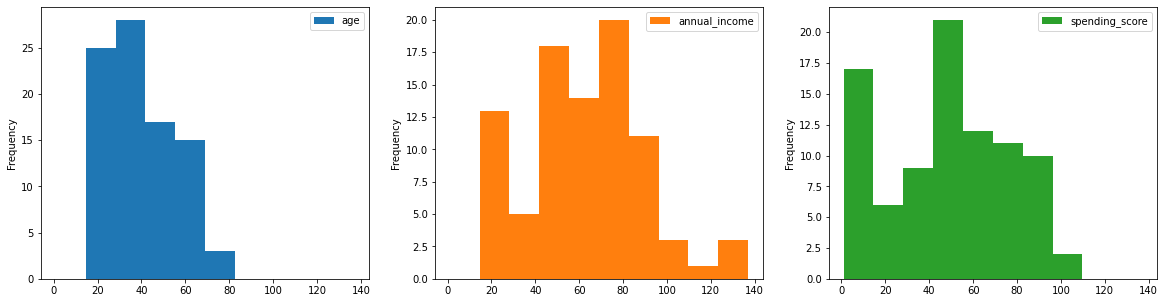

In [13]:
#Histograma_Homens 
fig,ax = plt.subplots(1,3,figsize=(20, 5))
sdf = df.groupby(by='gender')
sdf.get_group("Male").plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

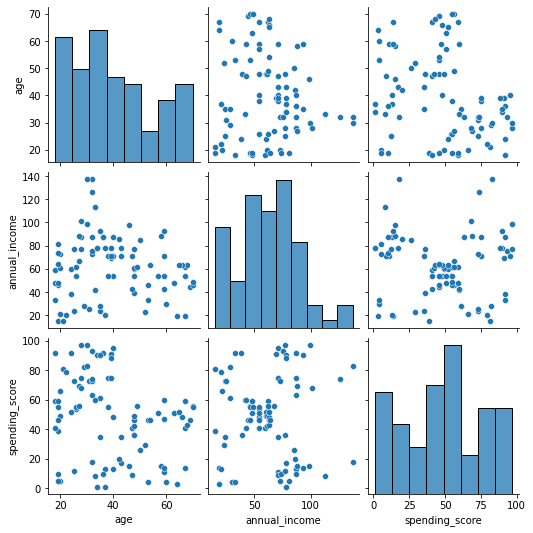

In [14]:
sns.pairplot(sdf.get_group("Male"))
plt.show()

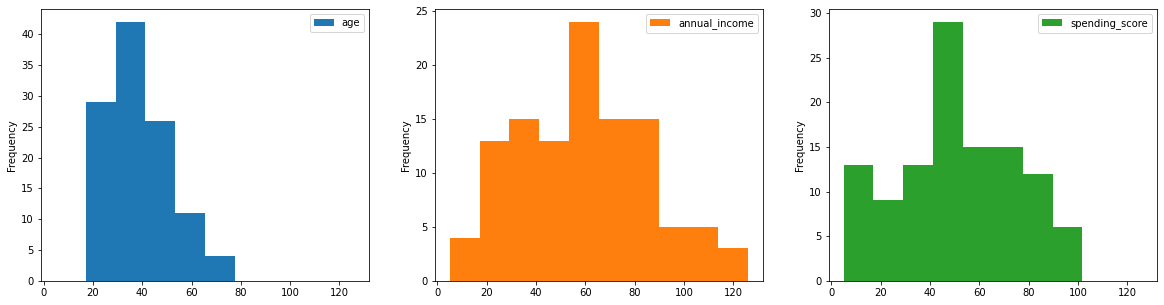

In [14]:
#histograma_Mulheres
fig,ax = plt.subplots(1,3,figsize=(20, 5))
sdf2 = df.groupby(by='gender')
sdf2.get_group("Female").plot(kind='hist',ax=ax, subplots=True, bins=10)
plt.show()

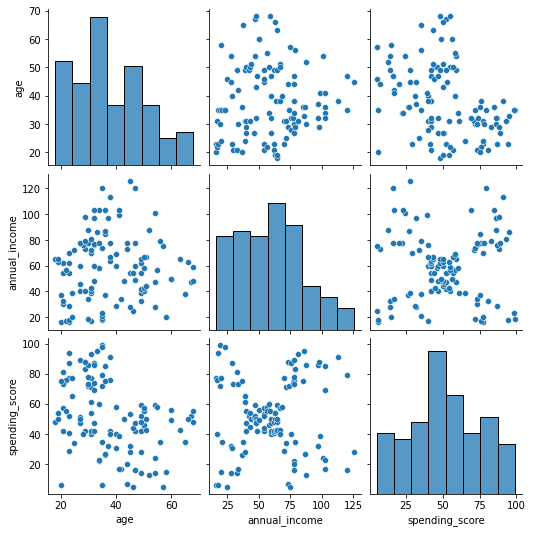

In [15]:
sns.pairplot(sdf.get_group("Female"))
plt.show()

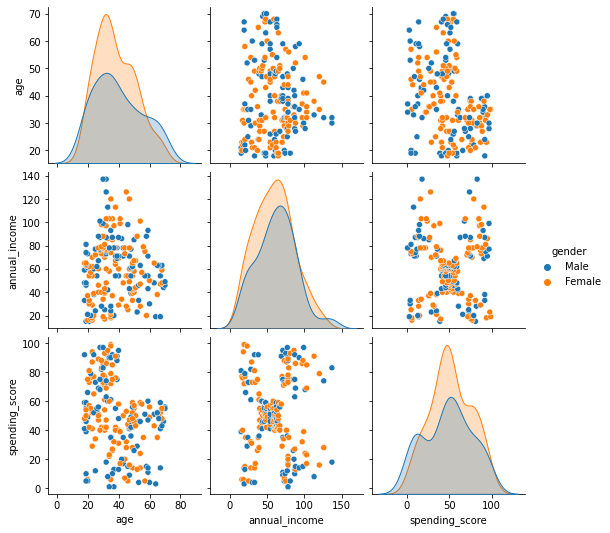

In [16]:
sns.pairplot(df ,hue="gender")
plt.show()

In [17]:
df1=pd.get_dummies(df, drop_first=True) 
#tranformando os generos em 0 e 1(drop first dropa a primera colula do dummie) 0 Mulher e 1 Homem
df1

,age,annual_income,spending_score,gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


In [18]:
df1 = df1.rename(columns={'gender_Male':'gender'}) 
df1.head(1)

,age,annual_income,spending_score,gender
0,19,15,39,1


In [42]:
df2 = df1.copy()


In [43]:
df2.drop('gender', axis = 1, inplace = True)


In [44]:
df2.head()

,age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [45]:
scal = MinMaxScaler() # dados normalizados entre 0 e 1
temp = scal.fit_transform(df2)
df2_scal = pd.DataFrame(temp,columns=df2.columns, index=df2.index)
df2_scal.head()

,age,annual_income,spending_score
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


In [50]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=4, random_state=1).fit(df2_scal.values)
kmeans.labels_
df2_scal['clusterlabels'] = kmeans.labels_

In [51]:
#Visualize all the original dimensions

features = df2_scal[['age', 'annual_income','spending_score']]

fig = px.scatter_matrix(
    df2_scal,
    dimensions=features,
   color=df2_scal['clusterlabels']
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [65]:
#2D PCA Scatter Plot

pca = PCA(n_components=2)

X = df2_scal[["age", "annual_income", "spending_score"]]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=1, y=0, color=df2_scal['clusterlabels'])
fig.show()

In [66]:
X = df2_scal[["age", "annual_income", "spending_score"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df2_scal['clusterlabels'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [55]:
df3 = df.copy()

In [57]:
df3['clusterlabels'] = df2_scal['clusterlabels']

In [58]:
df3

,gender,age,annual_income,spending_score,clusterlabels
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,2
196,Female,45,126,28,3
197,Male,32,126,74,2
198,Male,32,137,18,3


In [64]:
df3.loc[(df3['clusterlabels'] == 0)]

,gender,age,annual_income,spending_score,clusterlabels
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
113,Male,19,64,46,0
114,Female,18,65,48,0
115,Female,19,65,50,0
120,Male,27,67,56,0


NORMALIZANDO OS DADOS E CLUSTERIZANDO   


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scal = MinMaxScaler() # dados normalizados entre 0 e 1
temp = scal.fit_transform(df1)
df1_scal = pd.DataFrame(temp,columns=df1.columns, index=df1.index)
df1_scal.head()

,age,annual_income,spending_score,gender
0,0.019231,0.000000,0.387755,1.0
1,0.057692,0.000000,0.816327,1.0
2,0.038462,0.008197,0.051020,0.0
3,0.096154,0.008197,0.775510,0.0
4,0.250000,0.016393,0.397959,0.0


In [21]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=4, random_state=1).fit(df1_scal.values)
kmeans.labels_
df1_scal['clusterlabels'] = kmeans.labels_

In [52]:
#
# nsions
import plotly.express as px
from sklearn.decomposition import PCA

features = df1_scal[['age', 'annual_income', 'spending_score', 'gender']]

fig = px.scatter_matrix(df1_scal,dimensions=features,color=df1_scal['clusterlabels'])
fig.update_traces(diagonal_visible=False)
fig.show()

In [33]:
#2D PCA Scatter Plot

pca = PCA(n_components=2)

X = df1_scal[["age", "annual_income", "spending_score"]]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

fig = px.scatter(components, x=1, y=0, color=df1_scal['clusterlabels'])
fig.show()

In [37]:
X = df1_scal[["age", "annual_income", "spending_score"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df1_scal['clusterlabels'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [39]:
df['clusterlabels'] =  df1_scal['clusterlabels']
df

,gender,age,annual_income,spending_score,clusterlabels
0,Male,19,15,39,1
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,0
4,Female,31,17,40,0
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,2
197,Male,32,126,74,1
198,Male,32,137,18,3


In [41]:
df.loc[(df['clusterlabels'] == 1)]

,gender,age,annual_income,spending_score,clusterlabels
0,Male,19,15,39,1
1,Male,21,15,81,1
15,Male,22,20,79,1
17,Male,20,21,66,1
21,Male,25,24,73,1
23,Male,31,25,73,1
25,Male,29,28,82,1
27,Male,35,28,61,1
33,Male,18,33,92,1
41,Male,24,38,92,1


In [103]:

df1_scal.loc[(df1_scal['clusterlabels'] == 0)]

,age,annual_income,spending_score,gender,clusterlabels
3,0.096154,0.008197,0.775510,0.0,0
4,0.250000,0.016393,0.397959,0.0,0
5,0.076923,0.016393,0.765306,0.0,0
7,0.096154,0.024590,0.948980,0.0,0
9,0.230769,0.032787,0.724490,0.0,0
11,0.326923,0.032787,1.000000,0.0,0
13,0.115385,0.040984,0.775510,0.0,0
19,0.326923,0.065574,0.989796,0.0,0
29,0.096154,0.114754,0.877551,0.0,0
31,0.057692,0.122951,0.734694,0.0,0


In [154]:
df1_scal

,age,annual_income,spending_score,gender,clusterlabels
0,0.019231,0.000000,0.387755,1.0,1
1,0.057692,0.000000,0.816327,1.0,1
2,0.038462,0.008197,0.051020,0.0,2
3,0.096154,0.008197,0.775510,0.0,0
4,0.250000,0.016393,0.397959,0.0,0
...,...,...,...,...,...
195,0.326923,0.860656,0.795918,0.0,2
196,0.519231,0.909836,0.275510,0.0,0
197,0.269231,0.909836,0.744898,1.0,3
198,0.269231,1.000000,0.173469,1.0,1


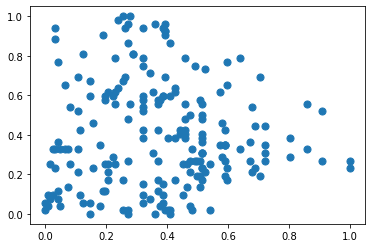

In [163]:
#AGE COM ANNUAL INCOME
plt.scatter(df1_scal['annual_income'],df1_scal['age'],  s=50, cmap='viridis')

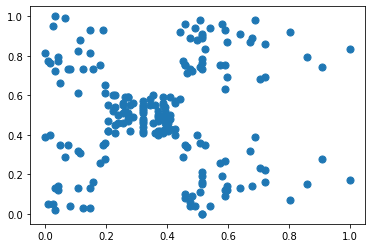

In [157]:
#ANNUAL INCOME e SPENDING SCORE
plt.scatter(df1_scal['annual_income'],df1_scal['spending_score'],  s=50, cmap='viridis')

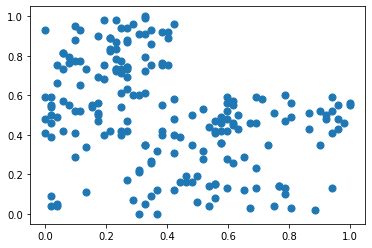

In [158]:
#AGE SPENDING SCORE
plt.scatter(df1_scal['age'],df1_scal['spending_score'],  s=50, cmap='viridis')

In [179]:
df_age_income= df1_scal[['age','annual_income']] 
df_age_spending= df1_scal[['age','spending_score']] 
df_age_gender= df1[['age','gender']] #não será utilizado
df_score_income= df1_scal[['spending_score','annual_income']] 
df_gender_score= df1[['gender','spending_score']]
df_gender_income= df1[['gender','annual_income']]

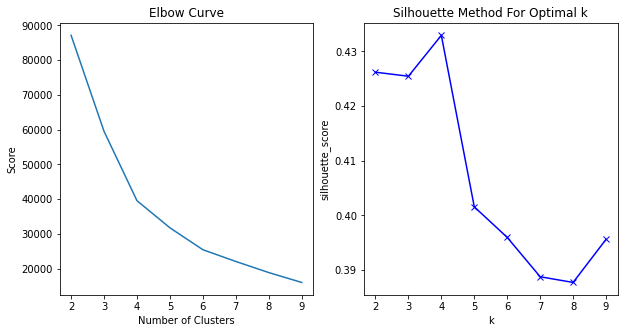

N_cluster: 2, score: 0.42620850066216065
N_cluster: 3, score: 0.4254725038202792
N_cluster: 4, score: 0.43295184273333076
N_cluster: 5, score: 0.40157587536205724
N_cluster: 6, score: 0.3959805131239844
N_cluster: 7, score: 0.3889803129716139
N_cluster: 8, score: 0.387679808215744
N_cluster: 9, score: 0.39794006006927296


In [141]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_age_income[['age']]
X_axis = df_age_income[['annual_income']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_income, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [182]:
df1.drop('spending_score', axis = 1, inplace = True) 


In [146]:
Z = scaler.fit_transform(df_age_income)
df_age_income=pd.DataFrame(Z,columns=['age','annual_income'])
df_age_income.head()


,age,annual_income
0,-1.424569,-1.738999
1,-1.281035,-1.738999
2,-1.352802,-1.700830
3,-1.137502,-1.700830
4,-0.563369,-1.662660


In [177]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(df_age_income)
kmeans.labels_
df_age_income['clusterlabels'] = kmeans.labels_
df_age_income

,age,annual_income,clusterlabels
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
...,...,...,...
195,35,120,2
196,45,126,2
197,32,126,2
198,32,137,2


In [183]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=4, random_state=1).fit(df_age_income.values)
kmeans.labels_
df_age_income['clusterlabels'] = kmeans.labels_


In [184]:
df_age_income.head()

,age,annual_income,clusterlabels
0,0.019231,0.000000,0
1,0.057692,0.000000,0
2,0.038462,0.008197,0
3,0.096154,0.008197,0
4,0.250000,0.016393,0


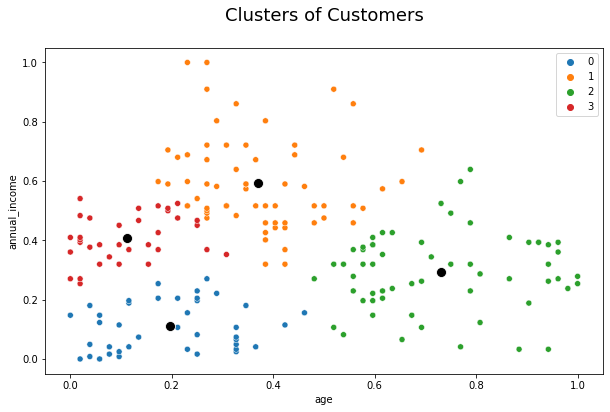

In [185]:
clusterlabels = df_age_income['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_income['age'], df_age_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",4))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

analisar os pontos fora dos clusters
Análise 01 - Pessoas com idades entre 30 e 60 possuem renda anual acima 90k confrome indicado no cluster 4 
No cluster 0 e 3 
verificar os pontos que estão entre os clusters - entender o que está representando

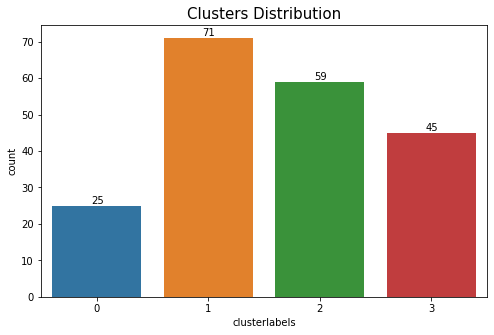

In [78]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_income,x='clusterlabels')
for p, label in zip(ax.patches, df_age_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()


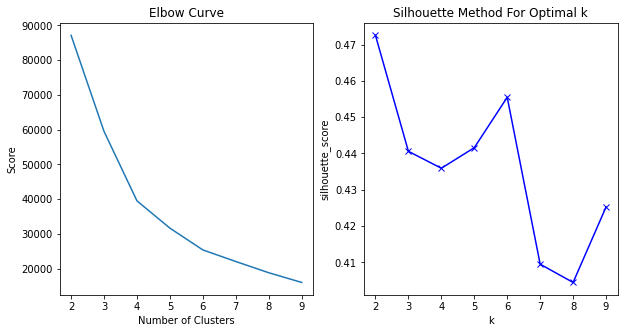

N_cluster: 2, score: 0.47252865228696783
N_cluster: 3, score: 0.44058221683010546
N_cluster: 4, score: 0.4359241957977821
N_cluster: 5, score: 0.4477968484613909
N_cluster: 6, score: 0.453990161946913
N_cluster: 7, score: 0.41032745642345075
N_cluster: 8, score: 0.4204533608529909
N_cluster: 9, score: 0.4416287223245881


In [165]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = [['age']]
X_axis = df_age_spending[['spending_score']]
score = [kmeans[i].fit(df_age_income).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_age_spending)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_age_spending, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()

for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_age_spending)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_age_spending,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [167]:
Y= np.array(df_age_spending)
kmeans = KMeans(n_clusters=4, random_state=1).fit(Y)
kmeans.labels_
df_age_spending['clusterlabels'] = kmeans.labels_

In [168]:
df_age_spending.head(2)

,age,spending_score,clusterlabels
0,0.019231,0.387755,2
1,0.057692,0.816327,0


In [169]:
print(kmeans.cluster_centers_)

[[0.23639053 0.80423862]
 [0.56933198 0.14285714]
 [0.17730769 0.39836735]
 [0.73036007 0.48480243]]


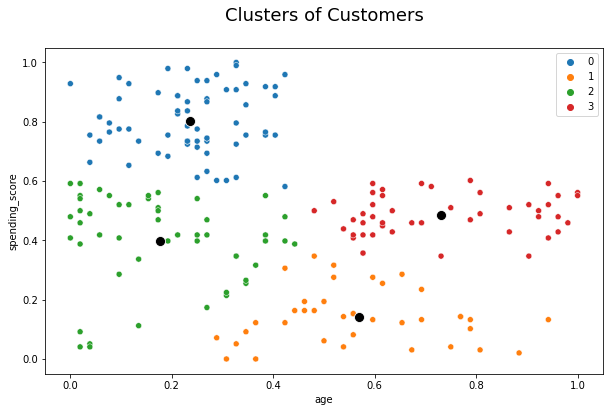

In [170]:
clusterlabels = df_age_spending['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_age_spending['age'], df_age_spending['spending_score'],hue=clusterlabels,palette=sns.color_palette("tab10",4))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

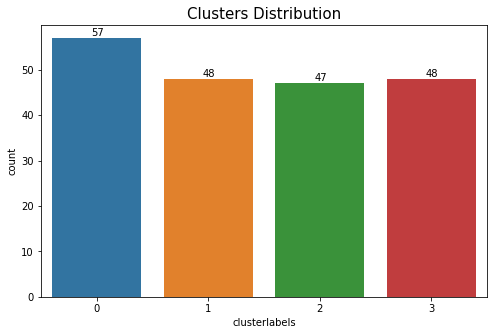

In [32]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_age_spending,x='clusterlabels')
for p, label in zip(ax.patches, df_age_spending['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

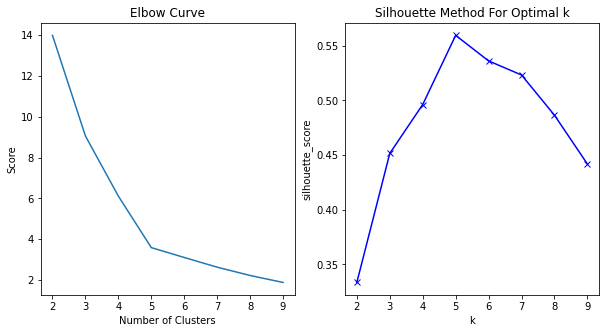

N_cluster: 2, score: 0.3334020547986479
N_cluster: 3, score: 0.451490930953965
N_cluster: 4, score: 0.49620078746385005
N_cluster: 5, score: 0.5594854531357839
N_cluster: 6, score: 0.5358176969351127
N_cluster: 7, score: 0.4365163220900728
N_cluster: 8, score: 0.4298397585833259
N_cluster: 9, score: 0.44159633404038096


In [172]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_score_income[['spending_score']]
X_axis = df_score_income[['annual_income']]
score = [kmeans[i].fit(df_score_income).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_score_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_score_income, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()

for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_score_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_score_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [173]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=5, random_state=1).fit(df_score_income.values)
kmeans.labels_
df_score_income['clusterlabels'] = kmeans.labels_

In [174]:
print(kmeans.cluster_centers_)

[[0.49508692 0.33029751]
 [0.16443149 0.6       ]
 [0.82783883 0.58638083]
 [0.79962894 0.08792846]
 [0.20319432 0.09265859]]


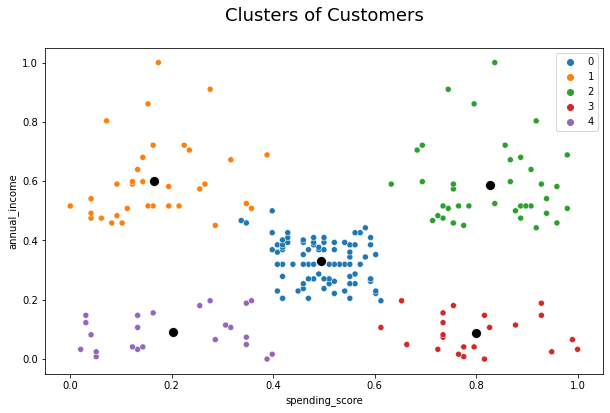

In [175]:
clusterlabels = df_score_income['clusterlabels']
plt.figure(figsize=(10, 6))
sns.scatterplot(df_score_income['spending_score'], df_score_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",5))
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

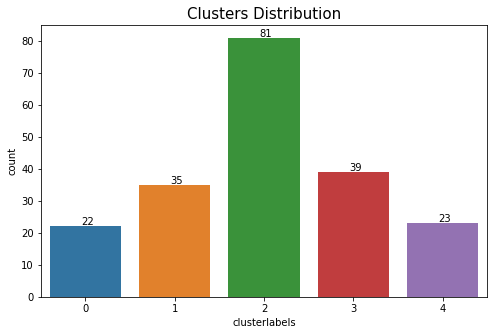

In [38]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_score_income,x='clusterlabels')
for p, label in zip(ax.patches, df_score_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

In [39]:
df_gender_score= df1[['gender','spending_score']]
df_gender_income= df1[['gender','annual_income']]

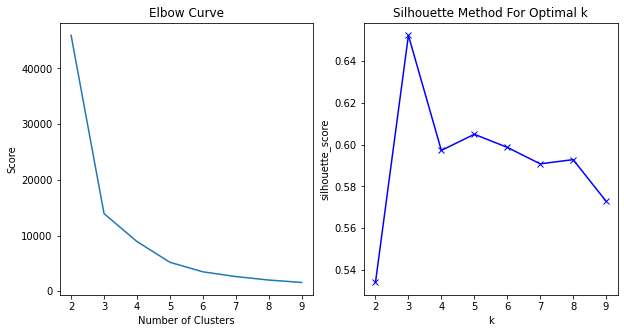

N_cluster: 2, score: 0.5339249783132509
N_cluster: 3, score: 0.6523636073255265
N_cluster: 4, score: 0.5972072360451244
N_cluster: 5, score: 0.6049443240263864
N_cluster: 6, score: 0.5986860516275994
N_cluster: 7, score: 0.5895282347494295
N_cluster: 8, score: 0.5931282343624773
N_cluster: 9, score: 0.5728814929339704


In [107]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_gender_score[['gender']]
X_axis = df_gender_score[['spending_score']]
score = [kmeans[i].fit(df_gender_score).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_gender_score)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_gender_score, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_gender_score)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_gender_score,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [41]:
Y = np.array(df_gender_score)
kmeans = KMeans(n_clusters=3, random_state=1).fit(Y)
kmeans.labels_
df_gender_score['clusterlabels'] = kmeans.labels_

In [42]:
print(kmeans.cluster_centers_)

[[ 0.5106383  14.59574468]
 [ 0.41052632 48.35789474]
 [ 0.43103448 82.06896552]]


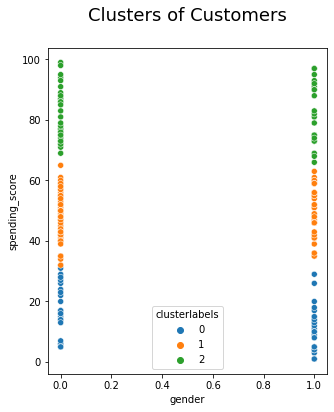

In [43]:
clusterlabels = df_gender_score['clusterlabels']
plt.figure(figsize=(5, 6))
sns.scatterplot(df_gender_score['gender'], df_gender_score['spending_score'],hue=clusterlabels,palette=sns.color_palette("tab10",3))
#sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

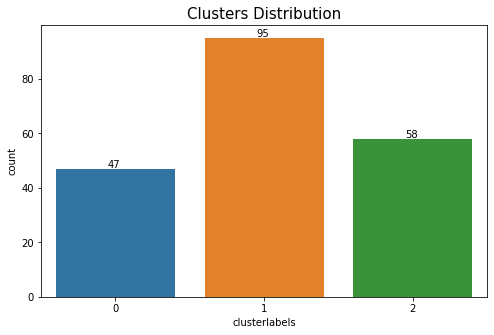

In [44]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_gender_score,x='clusterlabels')
for p, label in zip(ax.patches, df_gender_score['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.35, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

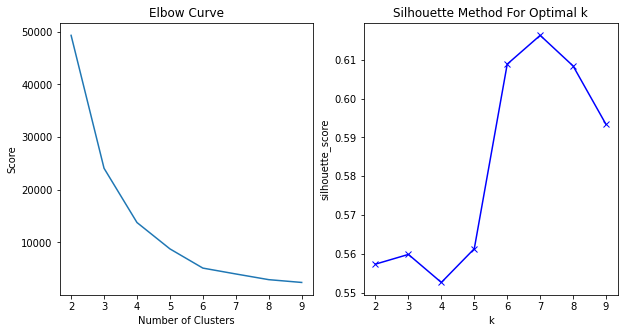

N_cluster: 2, score: 0.5573428986125637
N_cluster: 3, score: 0.5598445700688415
N_cluster: 4, score: 0.5526921653572678
N_cluster: 5, score: 0.5798400317830082
N_cluster: 6, score: 0.6089081980125964
N_cluster: 7, score: 0.6124174545919692
N_cluster: 8, score: 0.6044811418304189
N_cluster: 9, score: 0.5932784653858038


In [108]:
K_clusters = range(2,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_gender_income[['gender']]
X_axis = df_gender_income[['annual_income']]
score = [kmeans[i].fit(df_gender_income).inertia_ for i in range(len(kmeans))]

#Visualization
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,5))
ax1.plot(K_clusters, score)
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Score')
ax1.set_title('Elbow Curve')

sil = []
K_sil = range(2,10)
for k in K_sil:
    kmeans = KMeans(n_clusters = k).fit(df_gender_income)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_gender_income, labels, metric = 'euclidean')) 

#Visualization
ax2.plot(K_sil, sil,'bx-')
ax2.set_xlabel('k')
ax2.set_ylabel('silhouette_score')
ax2.set_title('Silhouette Method For Optimal k')
plt.show()


for i in range(2,10):
  kmeans_ = KMeans(n_clusters=i).fit(df_gender_income)
  labels_ = kmeans_.labels_
  coef = silhouette_score(df_gender_income,labels_)
  
  print("N_cluster: {}, score: {}".format(i,coef))

In [46]:
Y = np.array(df_gender_income)
kmeans = KMeans(n_clusters=6, random_state=1).fit(Y)
kmeans.labels_
df_gender_income['clusterlabels'] = kmeans.labels_
print(kmeans.cluster_centers_)

[[  0.45652174  74.39130435]
 [  0.4375      22.        ]
 [  0.5        124.        ]
 [  0.45454545  59.45454545]
 [  0.5         93.        ]
 [  0.35714286  42.23809524]]


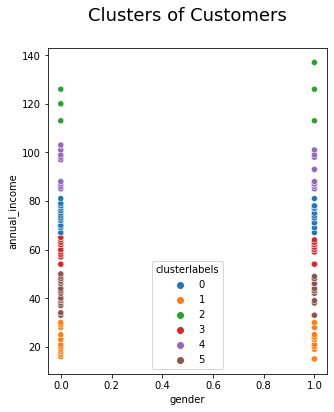

In [109]:
clusterlabels = df_gender_income['clusterlabels']
plt.figure(figsize=(5, 6))
sns.scatterplot(df_gender_income['gender'], df_gender_income['annual_income'],hue=clusterlabels,palette=sns.color_palette("tab10",6))
#sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100)
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

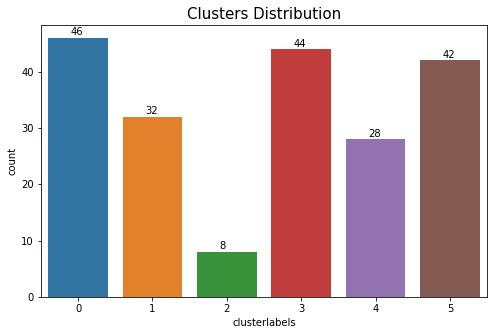

In [110]:
fig = plt.figure(figsize=(8,5))
ax = sns.countplot(data=df_gender_income,x='clusterlabels')
for p, label in zip(ax.patches, df_gender_income['clusterlabels'].value_counts().sort_index()): 
    ax.annotate(label, (p.get_x()+0.30, p.get_height()+0.50))
plt.title('Clusters Distribution', fontsize = 15)
plt.show()

PCA

In [56]:
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

In [125]:
data_tx=StandardScaler().fit_transform(df1)

In [159]:
pca = PCA(n_components=0.8)
pca.fit(data_tx)
df_1 = pca.transform(data_tx)

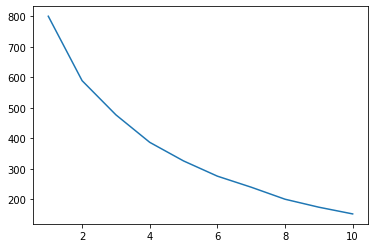

In [126]:
k_inertia=[]

for i in range(1, 11):
    km=KMeans(n_clusters=i, n_init=10, init='k-means++')
    km.fit(data_tx)
    k_inertia.append(km.inertia_)
plt.plot(range(1,11), k_inertia)

In [127]:
km=KMeans(n_clusters=5)

In [128]:
km.fit(data_tx)

KMeans(n_clusters=5)

In [129]:
cluster_centers=km.cluster_centers_
cluster_centers

array([[-0.44315931,  1.03973525,  1.17726383,  0.07050951],
       [ 0.75798289,  0.0706808 , -0.52766874, -0.88640526],
       [-0.86658278, -0.74086862,  0.17566756, -0.88640526],
       [ 1.03300273, -0.00647949, -0.7472677 ,  1.12815215],
       [-1.02216271, -0.54620453,  0.12256521,  1.12815215]])

In [151]:
clusters=km.predict(data_tx)
clusters

array([4, 4, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 1, 2, 3, 4, 2, 4, 3, 2, 4, 4,
       1, 4, 1, 4, 1, 4, 2, 2, 3, 2, 3, 4, 1, 2, 1, 2, 2, 2, 1, 4, 3, 2,
       1, 2, 1, 2, 2, 2, 1, 4, 2, 3, 1, 3, 1, 3, 2, 3, 3, 4, 1, 1, 3, 4,
       1, 1, 4, 2, 3, 1, 1, 1, 3, 4, 1, 4, 2, 1, 3, 4, 3, 1, 2, 3, 1, 2,
       2, 1, 1, 4, 3, 1, 2, 4, 1, 2, 3, 4, 2, 1, 3, 4, 3, 2, 1, 3, 3, 3,
       3, 2, 1, 4, 2, 2, 1, 1, 1, 1, 4, 1, 1, 0, 2, 0, 3, 0, 3, 0, 3, 0,
       2, 0, 4, 0, 1, 0, 4, 0, 1, 0, 2, 0, 4, 0, 3, 0, 1, 0, 3, 0, 1, 0,
       1, 0, 3, 0, 3, 0, 1, 0, 4, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 1, 0,
       3, 0, 3, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 1, 0,
       0, 0])

In [152]:
pca=PCA(n_components=2)
reduced_data=pca.fit_transform(data_tx)
reduced_data

array([[-4.06382715e-01, -5.20713635e-01],
       [-1.42767287e+00, -3.67310199e-01],
       [ 5.07605706e-02, -1.89406774e+00],
       [-1.69451310e+00, -1.63190805e+00],
       [-3.13108383e-01, -1.81048272e+00],
       [-1.71744627e+00, -1.59926418e+00],
       [ 7.90821124e-01, -1.94727112e+00],
       [-2.14832159e+00, -1.50537369e+00],
       [ 2.77428623e+00, -8.82987672e-01],
       [-1.21629477e+00, -1.61640464e+00],
       [ 2.62905084e+00, -8.61237043e-01],
       [-1.68947038e+00, -1.54542784e+00],
       [ 1.68582253e+00, -2.02394479e+00],
       [-1.64607339e+00, -1.52251259e+00],
       [ 1.17443628e+00, -6.12790961e-01],
       [-1.32613070e+00, -2.36719149e-01],
       [ 1.67728253e-02, -1.74344572e+00],
       [-1.07842454e+00, -2.44715641e-01],
       [ 1.48758780e+00, -5.72676028e-01],
       [-1.66373169e+00, -1.43259774e+00],
       [ 4.88090311e-01, -3.92921145e-01],
       [-1.01895051e+00, -1.66247511e-01],
       [ 1.35891492e+00, -1.82866936e+00],
       [-7.

In [153]:
reduced_data.shape, df1.shape, clusters.shape

((200, 2), (200, 4), (200,))

In [154]:
reduced_data=pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_data.head()

,PC1,PC2
0,-0.406383,-0.520714
1,-1.427673,-0.367310
2,0.050761,-1.894068
3,-1.694513,-1.631908
4,-0.313108,-1.810483


In [155]:
reduced_data['clusters']=clusters
reduced_data.head()

,PC1,PC2,clusters
0,-0.406383,-0.520714,4
1,-1.427673,-0.367310,4
2,0.050761,-1.894068,2
3,-1.694513,-1.631908,2
4,-0.313108,-1.810483,2


In [156]:
reduced_data['clusters'].value_counts()

1    51
3    41
0    40
2    40
4    28
Name: clusters, dtype: int64

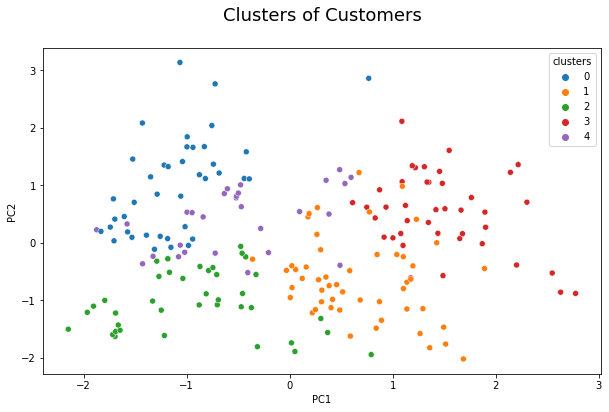

In [160]:
clusterlabels = reduced_data['clusters']
plt.figure(figsize=(10, 6))
sns.scatterplot(reduced_data['PC1'], reduced_data['PC2'],hue=clusterlabels,palette=sns.color_palette("tab10",5))
plt.title('Clusters of Customers\n', fontsize = 18)
plt.show()

JOGAR OS DADOS PARA O DF1 E VERIFICAR QUAIS SÃO ESSES GRUPOS E COMPARAR COM O KMEANS ???

HC

In [509]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
data_t= min_max_scaler.fit_transform(df1)
data_t[0:5]

array([[0.01923077, 0.        , 0.3877551 , 1.        ],
       [0.05769231, 0.        , 0.81632653, 1.        ],
       [0.03846154, 0.00819672, 0.05102041, 0.        ],
       [0.09615385, 0.00819672, 0.7755102 , 0.        ],
       [0.25      , 0.01639344, 0.39795918, 0.        ]])

In [510]:
from sklearn.metrics.pairwise import pairwise_distances
dist_matrix = pairwise_distances(data_t,data_t) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [511]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

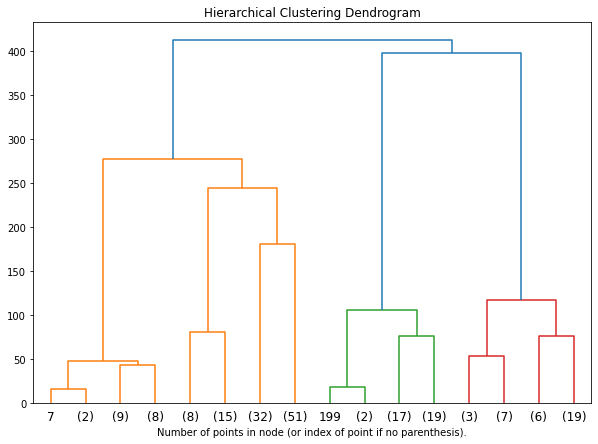

In [512]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(df1)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [513]:
n_clusters = 5
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(df1)

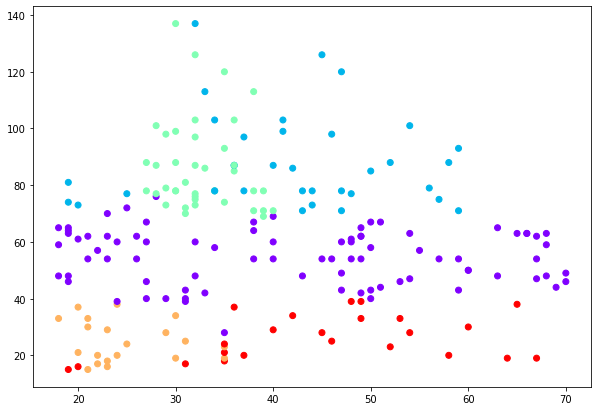

In [522]:
plt.figure(figsize=(10, 7))
plt.scatter(df1.iloc[:,0].values, df1.iloc[:,1].values, c=cluster.labels_, cmap='rainbow')
plt.show()

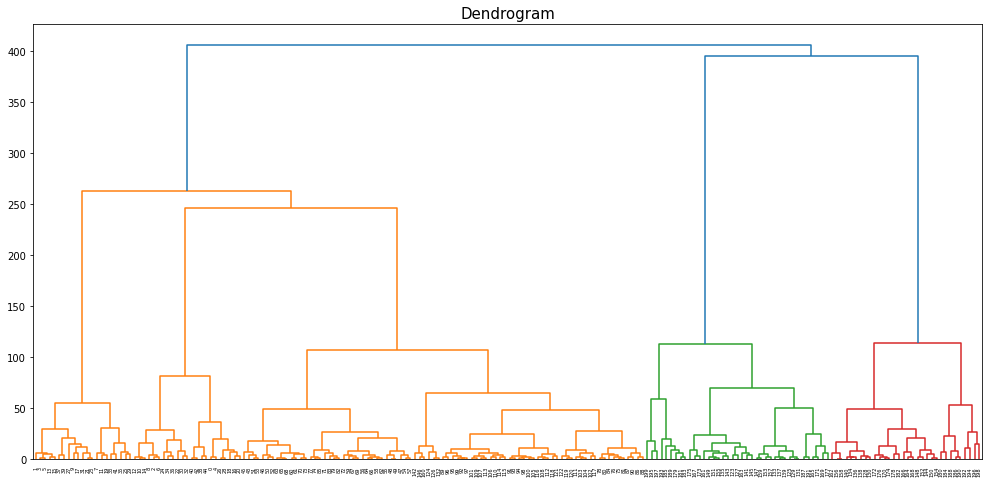

In [523]:
plt.figure(figsize = (17, 8))

dendo = dendrogram(linkage(df_score_income, method = 'ward'))
plt.title('Dendrogram', fontsize = 15)
plt.show()

In [526]:
agc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = agc.fit_predict(df_score_income)

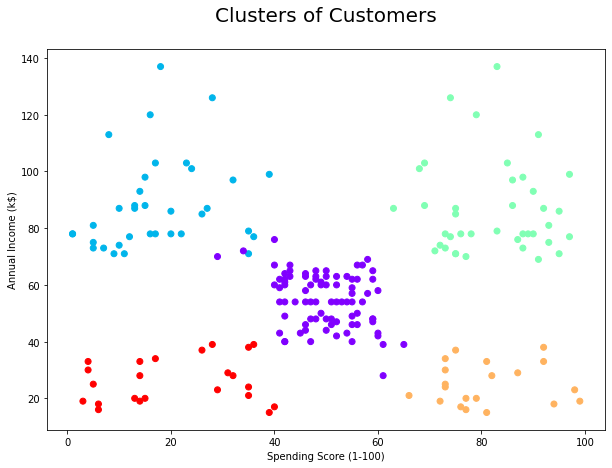

In [531]:
plt.figure(figsize=(10, 7))
plt.scatter(df_score_income.iloc[:,0].values, df_score_income.iloc[:,1].values, c=cluster.labels_, cmap='rainbow')

plt.title('Clusters of Customers\n ', fontsize = 20)
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()